In [21]:
import os
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from spacytextblob.spacytextblob import SpacyTextBlob
# Initialise spaCy
nlp = spacy.load("en_core_web_sm")


In [38]:
#Create textblob
spacy_text_blob = SpacyTextBlob()
#Add pipe
nlp.add_pipe(spacy_text_blob)

In [112]:
# Read csv and save in variable
data = pd.read_csv(os.path.join("..", "data", "abcnews-date-text.csv"))

#Get a list of every date
dates = data["publish_date"].unique()

20030219

## Calculate the sentiment score for every headline in the data. You can do this using the spaCyTextBlob

In [66]:
#List of total sentiment score for each day
total_scores = []

#List of average sentiment score for each day
mean_scores = []

#List of all days in the correct order
days = []

#For each day
for day in dates:
    
    #This variable will contain the total sentiment score
    score = 0
    
    #This is a list of every headline in the day we are looping through
    headlines = data[data["publish_date"]==day]
    
    #For each headline
    for headline in nlp.pipe(headlines["headline_text"], batch_size=500):
        
        #Calculate sentiment score
        headline_score = headline._.sentiment.polarity
        
        #Calculate total sentiment score
        score = headline_score + score
    
    #Calculate average sentiment for all days
    mean_score = score / len(headlines)
    
    #Append the total score to list
    total_scores.append(score)
    
    #Append average sentiment to list
    mean_scores.append(mean_score)
    
    #Append current day to list
    days.append(day)
    
    

## Create and save a plot of sentiment over time

In [168]:
#Calculate 7 day rolling average
smoothed_sentiment_weeks = pd.Series(total_scores).rolling(7).mean()

#Calculate 30 day rolling average
smoothed_sentiment_months = pd.Series(total_scores).rolling(30).mean()

#Calculate 365 day rolling average
smoothed_sentiment_years = pd.Series(total_scores).rolling(365).mean()


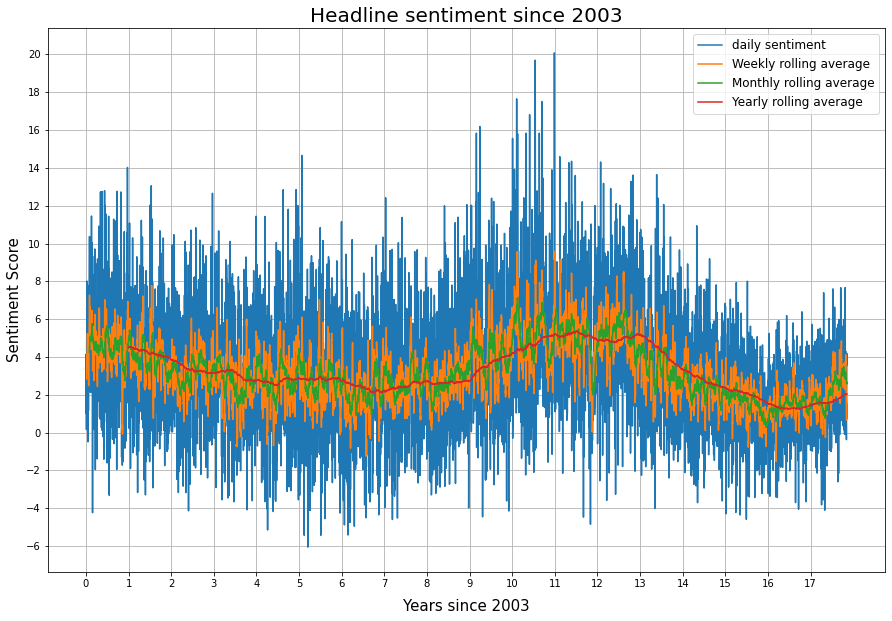

In [215]:
#Create figure
fig = plt.figure(figsize = (15,10)) 
#Create a grid for readability
plt.grid()

#Plot sentiment for every day
plt.plot(total_scores)
#Plot average sentiment for 7 days rolling
plt.plot(smoothed_sentiment_weeks)
#Plot average sentiment for 30 days rolling
plt.plot(smoothed_sentiment_months)
#Plot average sentiment for 365 days rolling
plt.plot(smoothed_sentiment_years)


#Create title, labels and legend
plt.title("Headline sentiment since 2003",fontsize= 20)
plt.xlabel("Years since 2003", fontsize= 15, labelpad=10)
plt.ylabel("Sentiment Score", fontsize= 15)
plt.legend(["daily sentiment", "Weekly rolling average", "Monthly rolling average", "Yearly rolling average"],
           loc='upper right',
            fontsize= 12)

#Set x ticks to be in years rather than default (days)
plt.xticks(np.arange(0, len(total_scores)+1,365), range(0,18))
#Set y ticks to be increments of two rather than default (5)
plt.yticks(np.arange(int(min(total_scores)), int(max(total_scores)+1),2))

#Show plot and save figure
plt.show()
fig.savefig("../sentiment_score_7.jpg")


In [9]:

import os
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from spacytextblob.spacytextblob import SpacyTextBlob


In [15]:

# Initialise spaCy
nlp = spacy.load("en_core_web_sm")
#Create textblob
spacy_text_blob = SpacyTextBlob()
#Add pipe
nlp.add_pipe(spacy_text_blob)

# Read csv and save in variable
data = pd.read_csv(os.path.join("..", "data", "abcnews-date-text.csv"))
#Get a list of every date
dates = data["publish_date"].unique()


#List of  mean score for each day
mean_scores = []
    
#For each day
for day in dates:
    #This variable will contain all sentiment scores for this day
    scores = []
    #This is a list of every headline in the day we are looping through
    headlines = data[data["publish_date"]==day]
    
    #For each headline from that day
    for headline in nlp.pipe(headlines["headline_text"], batch_size=500):
        #Calculate sentiment score
        headline_score = headline._.sentiment.polarity
        #Append score
        scores.append(headline_score)
            
    #calculate mean score for the day
    mean_scores.append(np.mean(scores))

KeyboardInterrupt: 

In [16]:
#Calculate 7 day rolling average
smoothed_sentiment_weeks = pd.Series(mean_scores).rolling(7).mean()
#Calculate 30 day rolling average
smoothed_sentiment_months = pd.Series(mean_scores).rolling(30).mean()
#Calculate 365 day rolling average
smoothed_sentiment_years = pd.Series(mean_scores).rolling(365).mean()

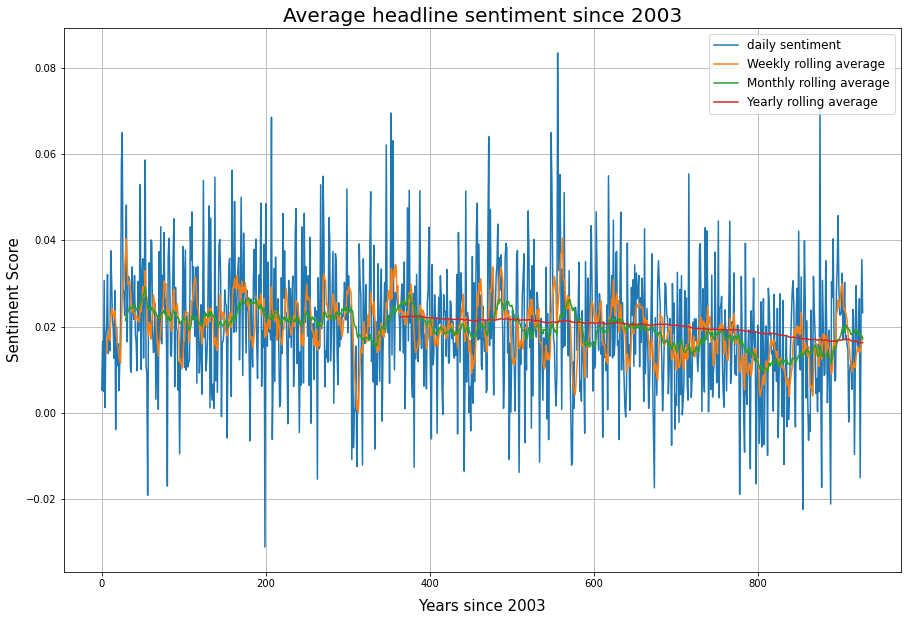

NameError: name 'mean' is not defined

In [20]:

#Create figure
fig = plt.figure(figsize = (15,10)) 
#Create a grid for readability
plt.grid()

#Plot sentiment for every day
plt.plot(mean_scores)
#Plot average sentiment for 7 days rolling
plt.plot(smoothed_sentiment_weeks)
#Plot average sentiment for 30 days rolling
plt.plot(smoothed_sentiment_months)
#Plot average sentiment for 365 days rolling
plt.plot(smoothed_sentiment_years)

#Create title, labels and legend
plt.title("Average headline sentiment since 2003",fontsize= 20)
plt.xlabel("Years since 2003", fontsize= 15, labelpad=10)
plt.ylabel("Sentiment Score", fontsize= 15)
plt.legend(["daily sentiment", "Weekly rolling average", "Monthly rolling average", "Yearly rolling average"],
            loc='upper right',
            fontsize= 12)

#Set x ticks to be in years rather than default (days)
#plt.xticks(np.arange(0, len(mean_scores)+1,365), range(0,18))
    
#Show plot and save figure
plt.show()
fig.savefig("../output/sentiment_score.jpg")
    
# Define behaviour when called from command line
if __name__=="__main__":
    main()